# Forecasting of META Stock Data Analysis

## Import

### Import libraries

In [1]:
## For Data Management
import pandas as pd
import numpy as np

## For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## For Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose

## For Web Scrapping
import yfinance as yf

## For Forecasting
import datetime as dt
from datetime import timedelta, date
import plotly.graph_objects as ga
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import statsmodels.api as sm
import warnings

### Import Dataset

In [2]:
today = date.today()
d1 = today.strftime('%Y-%m-%d')
end_date = d1

d2 = date.today() - timedelta(days=730)
d2 = d2.strftime('%Y-%m-%d')
start_date = d2

print('Data is starts from ', start_date,' to ', end_date)

Data is starts from  2022-07-12  to  2024-07-11


In [3]:
ticker = 'META'

df = yf.download(ticker, start=start_date, end=end_date, progress=False)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-12,164.800003,165.910004,162.100006,163.270004,162.935181,16639700
2022-07-13,160.160004,164.979996,159.610001,163.490005,163.154739,16555100
2022-07-14,161.220001,162.589996,157.279999,158.050003,157.725891,23765200
2022-07-15,160.539993,164.979996,159.820007,164.699997,164.362244,23342800
2022-07-18,166.750000,171.690002,165.639999,167.229996,166.887054,23574300


## Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2022-07-12 to 2024-07-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       502 non-null    float64
 1   High       502 non-null    float64
 2   Low        502 non-null    float64
 3   Close      502 non-null    float64
 4   Adj Close  502 non-null    float64
 5   Volume     502 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.5 KB


In [5]:
df.insert(0, 'Date', df.index, True)
#df['Date'] = df.index               ### Another way to add date column in Dataset
df.reset_index(drop=True, inplace=True) 

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-12,164.800003,165.910004,162.100006,163.270004,162.935181,16639700
1,2022-07-13,160.160004,164.979996,159.610001,163.490005,163.154739,16555100
2,2022-07-14,161.220001,162.589996,157.279999,158.050003,157.725891,23765200
3,2022-07-15,160.539993,164.979996,159.820007,164.699997,164.362244,23342800
4,2022-07-18,166.750000,171.690002,165.639999,167.229996,166.887054,23574300


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
497,2024-07-03,506.369995,511.279999,506.019989,509.959991,509.959991,6005600
498,2024-07-05,511.600006,540.869995,511.600006,539.909973,539.909973,21354100
499,2024-07-08,542.349976,542.809998,526.650024,529.320007,529.320007,14917500
500,2024-07-09,533.750000,537.479980,528.190002,530.000000,530.000000,8753200
501,2024-07-10,530.789978,538.880005,528.359985,534.690002,534.690002,10969900


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       502 non-null    datetime64[ns]
 1   Open       502 non-null    float64       
 2   High       502 non-null    float64       
 3   Low        502 non-null    float64       
 4   Close      502 non-null    float64       
 5   Adj Close  502 non-null    float64       
 6   Volume     502 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.6 KB


In [9]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,502,502.000000,502.000000,502.000000,502.000000,502.000000,5.020000e+02
mean,2023-07-09 16:21:02.151394304,285.538925,289.745737,282.039602,286.086793,285.617758,2.514415e+07
min,2022-07-12 00:00:00,90.080002,90.459999,88.089996,88.910004,88.727669,5.467500e+06
25%,2023-01-09 06:00:00,168.075001,171.037498,166.000004,168.840004,168.493763,1.586100e+07
50%,2023-07-11 12:00:00,288.539993,293.949997,285.375000,288.540009,287.948288,2.049580e+07
75%,2024-01-08 18:00:00,359.522507,361.584999,357.197495,358.575005,357.839668,2.808982e+07
max,2024-07-10 00:00:00,542.349976,542.809998,528.359985,539.909973,539.909973,2.323166e+08
std,NaN,130.608004,131.810607,129.169726,130.671375,130.591944,1.839957e+07


In [10]:
fig  = px.line(df, x='Date', y=df.columns, title='META Stock Price ')
fig.show()

In [11]:
df = df[['Date', 'Volume']]
df.head()   

,Date,Volume
0,2022-07-12,16639700
1,2022-07-13,16555100
2,2022-07-14,23765200
3,2022-07-15,23342800
4,2022-07-18,23574300


In [12]:
fig  = px.line(df, x='Date', y='Volume', title='META Stock Price ')
fig.show()
df.describe()

,Date,Volume
count,502,5.020000e+02
mean,2023-07-09 16:21:02.151394304,2.514415e+07
min,2022-07-12 00:00:00,5.467500e+06
25%,2023-01-09 06:00:00,1.586100e+07
50%,2023-07-11 12:00:00,2.049580e+07
75%,2024-01-08 18:00:00,2.808982e+07
max,2024-07-10 00:00:00,2.323166e+08
std,NaN,1.839957e+07


### Data Stationarity

In [13]:
def adf_test(df):
    result = adfuller(df)
    print(f'ADF Statistics : {result[0]}')
    print(f'p-value : {result[1]} ')
    if result[1]<= 0.05:
        print('Reject Null Hypothesis, Data is Stationary. We can use ARIMA Model')
    else:
        print('Fail to Reject Null Hypothesis, Data is not Stationarity. We cannot use ARIMA Model')
adf_test(df['Date'])

ADF Statistics : 9.419946853376674
p-value : 1.0 
Fail to Reject Null Hypothesis, Data is not Stationarity. We cannot use ARIMA Model


### seasonal_decompose

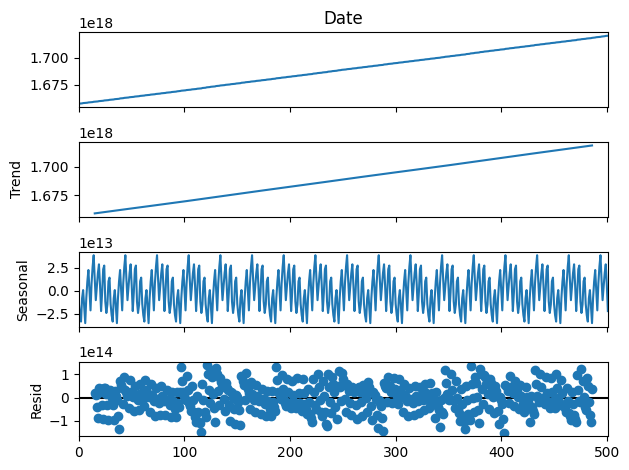

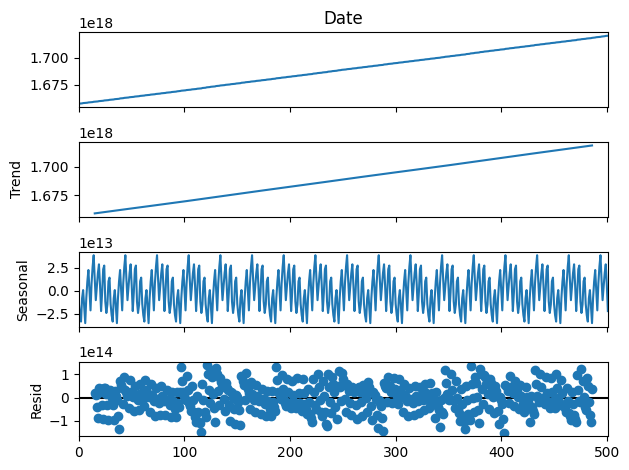

In [14]:
decompose = seasonal_decompose(df['Date'], model='additive', period=30)
decompose.plot()

### Find d value

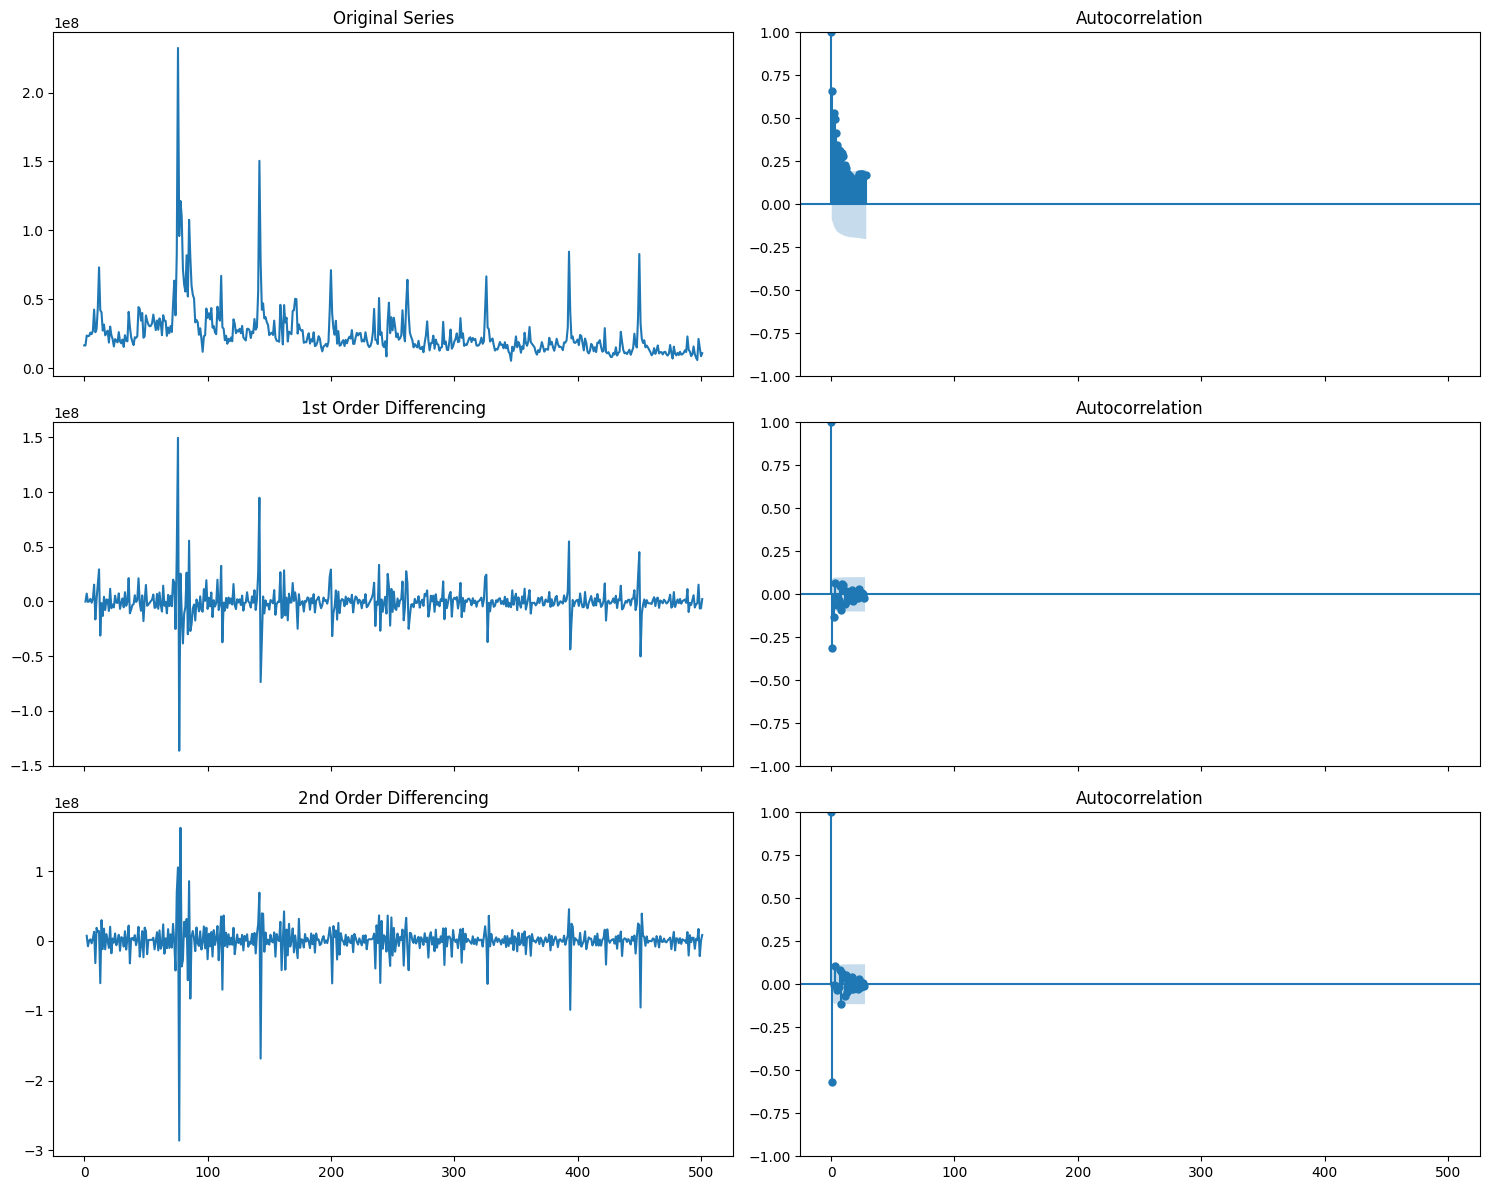

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharex=True)

# Original Series
axes[0, 0].plot(df['Volume'])
axes[0, 0].set_title('Original Series')
plot_acf(df['Volume'], ax=axes[0, 1])

# First Differencing
first_diff = df['Volume'].diff().dropna()
axes[1, 0].plot(first_diff)
axes[1, 0].set_title('1st Order Differencing')
plot_acf(first_diff, ax=axes[1, 1])

# Second Differencing
second_diff = first_diff.diff().dropna()
axes[2, 0].plot(second_diff)
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(second_diff, ax=axes[2, 1])

plt.tight_layout()
plt.show()


d = 1

### Find p-value

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

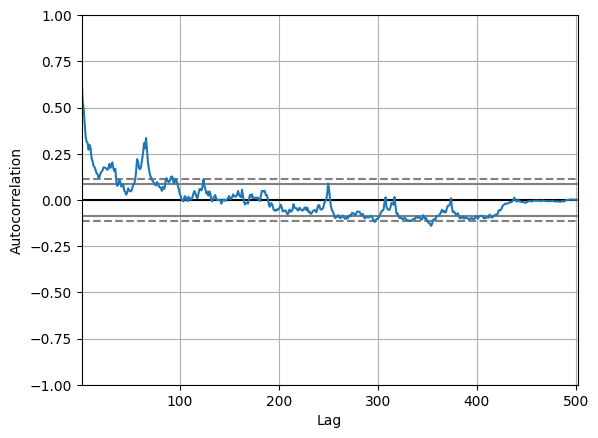

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['Volume'])

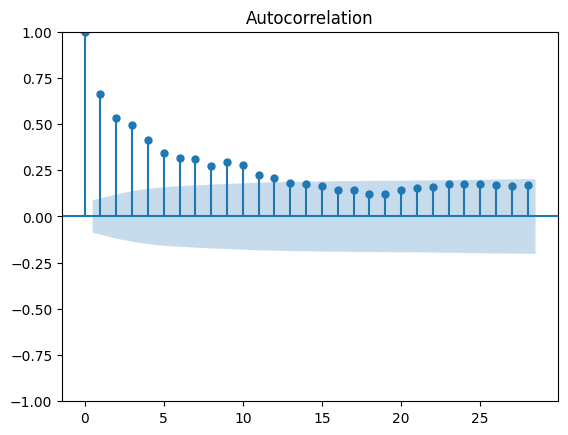

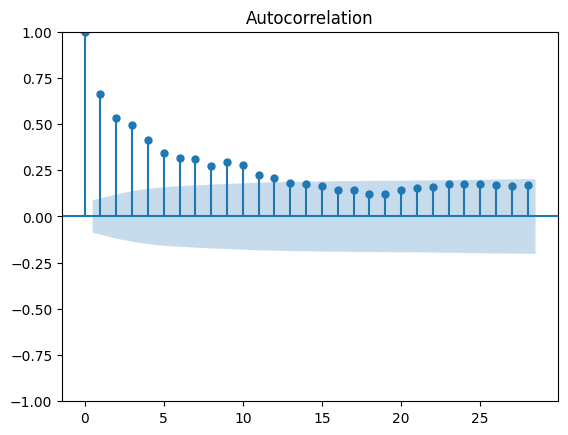

In [18]:
plot_acf(df['Volume'], alpha=0.05)

In [19]:
from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Volume']))
print(x_acf)

           0
0   1.000000
1   0.661398
2   0.533245
3   0.495201
4   0.414657
5   0.342974
6   0.315445
7   0.309122
8   0.271746
9   0.297225
10  0.279542
11  0.226227
12  0.210695
13  0.182725
14  0.178312
15  0.163517
16  0.144962
17  0.141282
18  0.119849
19  0.123426
20  0.142691
21  0.153333
22  0.157855
23  0.175961
24  0.174762
25  0.173957
26  0.169321
27  0.162535


p = 1

### Find q value

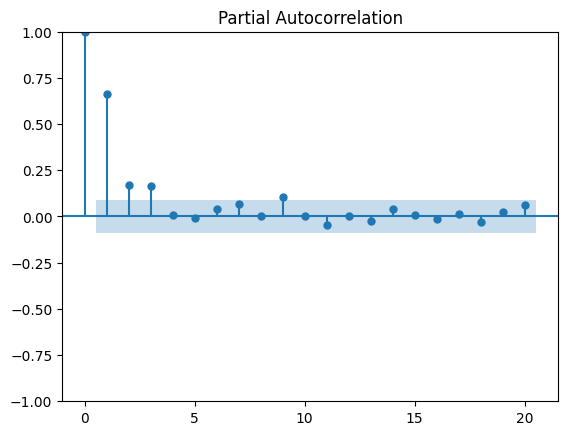

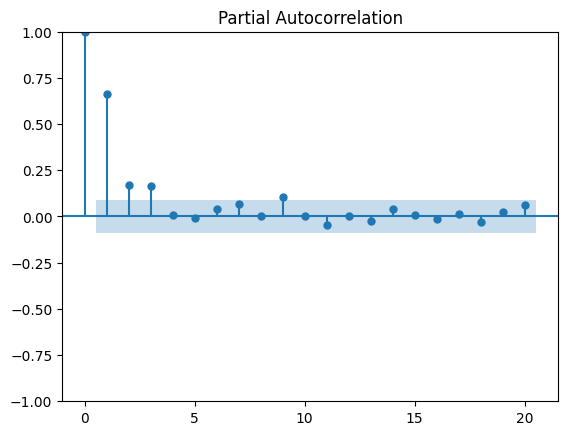

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Volume'],  lags=20, alpha=0.05)

In [22]:
q = 2

## Forecasting

In [23]:
q = 2
p = 1
d = 1

### Auto_Arima

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  502
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -8932.572
Date:                Thu, 11 Jul 2024   AIC                          17875.144
Time:                        12:04:31   BIC                          17896.227
Sample:                             0   HQIC                         17883.416
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4928      0.021     23.327      0.000       0.451       0.534
ar.L2          0.0654      0.028      2.326      0.020       0.010       0.120
ar.L3          0.1364      0.039      3.463      0.0

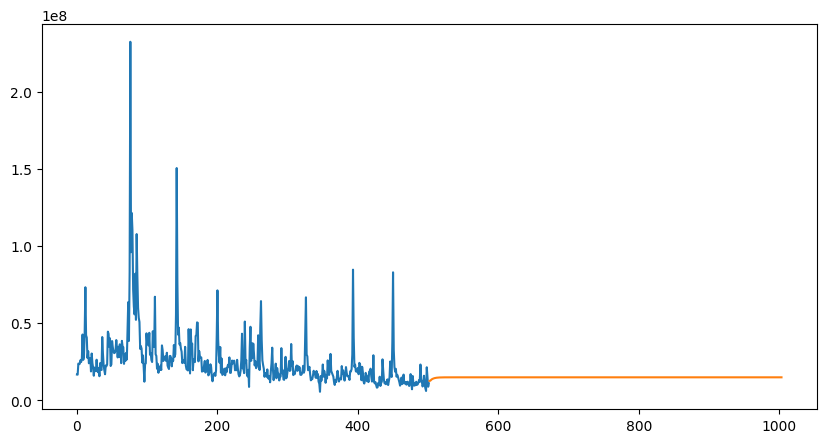

In [24]:
model = auto_arima(df['Volume'], seasonal=True, suppress_warnings=True)
print(model.summary())

# Predict Forecast
forecast = model.predict(len(df['Volume']), len(df['Volume'])+30 )
print(forecast)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Volume'], label='Actual')
plt.plot(forecast, label='Predicted')

### SARIMAX Fitting

In [25]:
model =sm.tsa.statespace.SARIMAX(df['Volume'],
                                  order=(p,d,q), 
                                  seasonal_order=(p,d,q, 12))
model_fit = model.fit()
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Volume   No. Observations:                  502
Model:             SARIMAX(1, 1, 2)x(1, 1, 2, 12)   Log Likelihood               -8790.906
Date:                            Thu, 11 Jul 2024   AIC                          17595.813
Time:                                    12:04:54   BIC                          17625.159
Sample:                                         0   HQIC                         17607.339
                                            - 502                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7711      0.108      7.117      0.000       0.559       0.983
ma.L1         -1.2568      0.135   

### Predictions

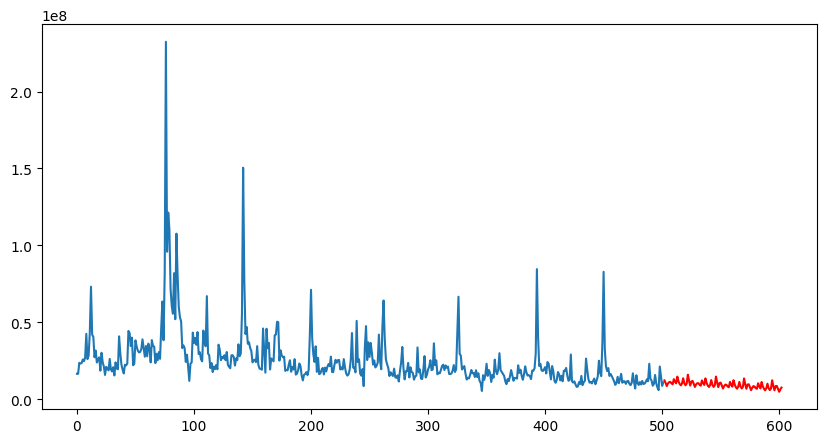

In [26]:
predictions = model_fit.predict(start=len(df['Volume']), end=len(df['Volume'])+100)

# Plot the forecast
plt.figure(figsize=[10, 5])
plt.plot(df['Volume'], label='Actual')
plt.plot(predictions, color='red', label='Predicted')


In [27]:
predictions = model_fit.predict(start=len(df['Volume']), end=len(df['Volume'])+10)
print(predictions)

502    1.233604e+07
503    1.065549e+07
504    8.649107e+06
505    1.038176e+07
506    1.117405e+07
507    1.137799e+07
508    1.041098e+07
509    9.809869e+06
510    1.314365e+07
511    1.147047e+07
512    1.043592e+07
Name: predicted_mean, dtype: float64
